In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neural_network import MLPClassifier

In [135]:
train_df = pd.read_csv('C:\\csv_files\\loan_prediction\\train.csv')
test_df = pd.read_csv('C:\\csv_files\\loan_prediction\\test.csv')

In [136]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [137]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [138]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<AxesSubplot: xlabel='Credit_History', ylabel='count'>

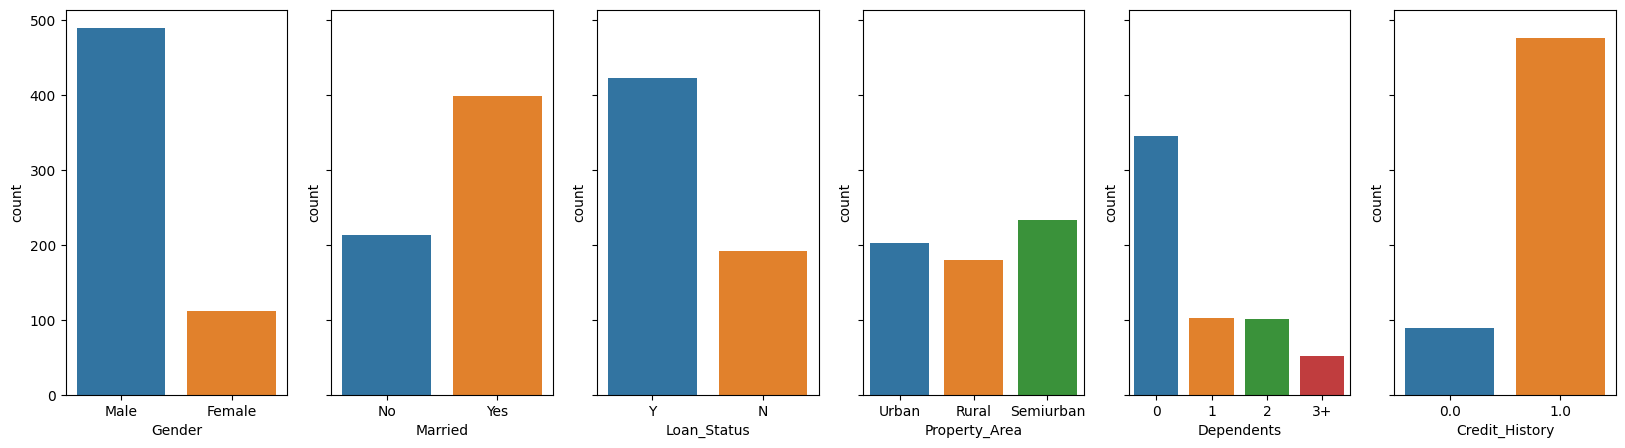

In [139]:
fig, axes = plt.subplots(1, 6, figsize=(20, 5), sharey=True)

# Gender
sns.countplot(ax=axes[0], x=train_df.Gender)
# Married or not
sns.countplot(ax=axes[1], x=train_df.Married)
# Loan Status
sns.countplot(ax=axes[2], x=train_df.Loan_Status)
# Property Area
sns.countplot(ax=axes[3], x=train_df.Property_Area)
# Dependents
sns.countplot(ax=axes[4], x=train_df.Dependents)
# Credit_History
sns.countplot(ax=axes[5], x=train_df.Credit_History)

In [116]:
Loan_ID = train_df.Loan_ID.to_list()
loanid = []
for i in Loan_ID:
    loanid.append(int(i.replace('LP','')))

In [140]:
train_df['TotalIncome'] = train_df['ApplicantIncome'] + train_df['CoapplicantIncome']
# train_df['loanid'] = loanid
train_df = train_df.drop(['Loan_ID','Self_Employed','Education','ApplicantIncome','CoapplicantIncome'],axis=1)
train_df['LoanAmount'].fillna(0,inplace = True)
train_df.Married = train_df.Married.map({'No':0,'Yes':1})
train_df.Dependents = train_df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
train_df.Property_Area = train_df.Property_Area.map({'Urban':0,'Rural':1,'Semiurban':2})
train_df.Loan_Status = train_df.Loan_Status.map({'N':0,'Y':1})
train_df.Gender = train_df.Gender.map({'Male':0,'Female':1})
train_df = train_df.ffill()

In [141]:
train_df

,Gender,Married,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,0.0,0.0,0.0,0.0,360.0,1.0,0,1,5849.0
1,0.0,1.0,1.0,128.0,360.0,1.0,1,0,6091.0
2,0.0,1.0,0.0,66.0,360.0,1.0,0,1,3000.0
3,0.0,1.0,0.0,120.0,360.0,1.0,0,1,4941.0
4,0.0,0.0,0.0,141.0,360.0,1.0,0,1,6000.0
...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,0.0,71.0,360.0,1.0,1,1,2900.0
610,0.0,1.0,3.0,40.0,180.0,1.0,1,1,4106.0
611,0.0,1.0,1.0,253.0,360.0,1.0,0,1,8312.0
612,0.0,1.0,2.0,187.0,360.0,1.0,0,1,7583.0


In [142]:
X = train_df.drop(['Loan_Status'],axis=1)
y = train_df.Loan_Status

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [144]:
log = LogisticRegression()
log.fit(X_train,y_train)
log_prediction = log.predict(X_test)
log_score = round(accuracy_score(y_test,log_prediction)*100,2)
print(confusion_matrix(y_test,log_prediction))
print(log_score)

[[21 22]
 [ 2 78]]
80.49


C:\Program Files\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [145]:
svm = SVC()
svm.fit(X_train,y_train)
svm_prediction = svm.predict(X_test)
svm_score = round(accuracy_score(y_test,svm_prediction)*100,2)
print(confusion_matrix(y_test,svm_prediction))
print(svm_score)

[[ 0 43]
 [ 1 79]]
64.23


In [146]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
decision_tree_prediction = decision_tree.predict(X_test)
decision_tree_score = round(accuracy_score(y_test,decision_tree_prediction)*100,2)
print(confusion_matrix(y_test,decision_tree_prediction))
print(decision_tree_score)

[[25 18]
 [16 64]]
72.36


In [147]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)
random_forest_prediction = random_forest.predict(X_test)
random_forest_score = round(accuracy_score(y_test,random_forest_prediction)*100,2)
print(confusion_matrix(y_test,random_forest_prediction))
print(random_forest_score)

[[19 24]
 [ 4 76]]
77.24


In [148]:
gaussian = GaussianNB()
gaussian.fit(X_train,y_train)
gaussian_prediction = gaussian.predict(X_test)
gaussian_score = round(accuracy_score(y_test,gaussian_prediction)*100,2)
print(confusion_matrix(y_test,gaussian_prediction))
print(gaussian_score)

[[21 22]
 [ 2 78]]
80.49


In [149]:
multinomial = MultinomialNB()
multinomial.fit(X_train,y_train)
multinomial_prediction = multinomial.predict(X_test)
mulinomial_score = round(accuracy_score(y_test,multinomial_prediction)*100,2)
print(confusion_matrix(y_test,multinomial_prediction))
print(mulinomial_score)

[[ 9 34]
 [12 68]]
62.6


In [150]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
mlp_prediction = mlp.predict(X_test)
mlp_score = round(accuracy_score(y_test,mlp_prediction)*100,2)
print(confusion_matrix(y_test,mlp_prediction))
print(mlp_score)

[[ 0 43]
 [ 0 80]]
65.04


In [151]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_prediction = knn.predict(X_test)
knn_score = round(accuracy_score(y_test,knn_prediction)*100,2)
print(confusion_matrix(y_test,knn_prediction))
print(knn_score)

[[ 4 39]
 [16 64]]
55.28


In [152]:
result_before_tuning={'Models':["Logistic","SVM","Decision Tree","Random Forest","Gaussian","Multinomial","MLP","KNN"],
                     'Scores':[log_score,svm_score,decision_tree_score,random_forest_score,gaussian_score,mulinomial_score,mlp_score,knn_score]
                     }
result_before_tuning = pd.DataFrame(result_before_tuning)

<AxesSubplot: xlabel='Models', ylabel='Scores'>

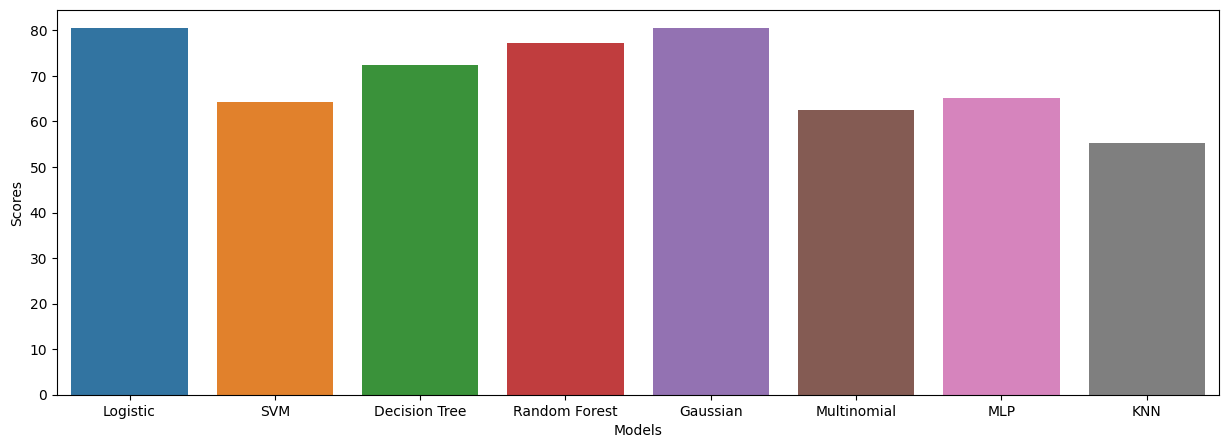

In [153]:
plt.figure(figsize=(15,5))
sns.barplot(result_before_tuning,x=result_before_tuning.Models,y=result_before_tuning.Scores)

In [154]:
result_before_tuning

,Models,Scores
0,Logistic,80.49
1,SVM,64.23
2,Decision Tree,72.36
3,Random Forest,77.24
4,Gaussian,80.49
5,Multinomial,62.60
6,MLP,65.04
7,KNN,55.28


In [155]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [156]:
test_df['TotalIncome'] = test_df['ApplicantIncome'] + test_df['CoapplicantIncome']
test_df = test_df.drop(['Loan_ID','Self_Employed','Education','ApplicantIncome','CoapplicantIncome'],axis=1)
test_df['LoanAmount'].fillna(0,inplace = True)
test_df.Married = test_df.Married.map({'No':0,'Yes':1})
test_df.Dependents = test_df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
test_df.Property_Area = test_df.Property_Area.map({'Urban':0,'Rural':1,'Semiurban':2})
test_df.Gender = test_df.Gender.map({'Male':0,'Female':1})
test_df = test_df.ffill()

In [157]:
test_df

,Gender,Married,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,0.0,1,0.0,110.0,360.0,1.0,0,5720
1,0.0,1,1.0,126.0,360.0,1.0,0,4576
2,0.0,1,2.0,208.0,360.0,1.0,0,6800
3,0.0,1,2.0,100.0,360.0,1.0,0,4886
4,0.0,0,0.0,78.0,360.0,1.0,0,3276
...,...,...,...,...,...,...,...,...
362,0.0,1,3.0,113.0,360.0,1.0,0,5786
363,0.0,1,0.0,115.0,360.0,1.0,0,4867
364,0.0,0,0.0,126.0,360.0,1.0,2,5243
365,0.0,1,0.0,158.0,360.0,1.0,1,7393


In [158]:
test_df.columns

Index(['Gender', 'Married', 'Dependents', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History', 'Property_Area', 'TotalIncome'],
      dtype='object')

In [159]:
train_df.columns

Index(['Gender', 'Married', 'Dependents', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History', 'Property_Area', 'Loan_Status', 'TotalIncome'],
      dtype='object')

In [168]:
loan_repayment = []
for i in log.predict(test_df):
    loan_repayment.append(i)

In [171]:
pred_df = pd.DataFrame({'Loan_Status':loan_repayment})

In [174]:
submission_df = [test_df,pred_df]
submission_df = pd.concat(submission_df,axis=1)

In [178]:
submission_df

,Gender,Married,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Loan_Status
0,Male,Yes,0,110.0,360.0,1.0,Urban,5720,1
1,Male,Yes,1,126.0,360.0,1.0,Urban,4576,1
2,Male,Yes,2,208.0,360.0,1.0,Urban,6800,1
3,Male,Yes,2,100.0,360.0,1.0,Urban,4886,1
4,Male,No,0,78.0,360.0,1.0,Urban,3276,1
...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,113.0,360.0,1.0,Urban,5786,1
363,Male,Yes,0,115.0,360.0,1.0,Urban,4867,1
364,Male,No,0,126.0,360.0,1.0,Semiurban,5243,1
365,Male,Yes,0,158.0,360.0,1.0,Rural,7393,1


In [177]:
submission_df.Married = submission_df.Married.map({0:'No',1:'Yes'})
submission_df.Dependents = submission_df.Dependents.map({0:'0',1:'1',2:'2',3:'3+'})
submission_df.Property_Area = submission_df.Property_Area.map({0:'Urban',1:'Rural',2:'Semiurban'})
submission_df.Gender = submission_df.Gender.map({0:'Male',1:'Female'})

In [ ]:
submission_df.to_csv('Loan_Repayment_prediction.csv',index=False)